# Left or Right Elbow Image Classifier



## Loading and Preparing the Data

Initially, we have to install all the libraries associated with the project:

FastAI, OS, PIL, MatPlot and Google Drive Import Libraries.

In [1]:
#import libraries
!pip install -Uqq fastai 
from fastai.vision.all import *
import os, sys
from os import listdir
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

     |████████████████████████████████| 188 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 


We need to mount the Google Drive to act as a path in order to allow adjustments to the image data through the cloud.

A Password is required to access the cloud.

In [2]:
#Mount Google Drive
drive.mount('/content/gdrive')

#Import Elbow Files
from google.colab import files
ElbowPath = "/content/gdrive/My Drive/Elbow/"

Mounted at /content/gdrive


150 Images were manually chosen and modified for use in this model.


In [3]:
#Print How Many Images Available
len(get_image_files(ElbowPath))

150

**Data Preparation**

For the next step, we have to prepare the data for the model.

The next code snippets primarily renames the filename to their respective labels at the front of the string of the filename.

The Dataset is Available to Download at: https://drive.google.com/drive/folders/1j-aEcx33a9sr8uiT3PsIBlSxbpVgk6ml?usp=sharing


In [4]:
#Declaring the Labels
LabelA = 'LElbow'
LabelB = 'RElbow'

In [5]:
#Loop through all Images downloaded
for img in get_image_files(ElbowPath):    
  #Rename Images to LElbow-LElbow# or R-Elbow-RElbow# depending on the respective label.
  if LabelA in str(img):
    img.rename(f"{img.parent}/{LabelA}-{img.name}")
  elif LabelB in str(img):
    img.rename(f"{img.parent}/{LabelB}-{img.name}")
  #Remove if mislabeled.
  else: os.remove(img) 

#Print How Many Images Available After Manipulation to Ensure No Data Loss
len(get_image_files(ElbowPath))

150

## Training the Model

In [7]:
#Define GetLabel function to retrieve the label of a filename
def GetLabel(FileName):
  return FileName.split('-')[0]

#Testing the Function
GetLabel("LElbow-LElbow.png")

'LElbow'

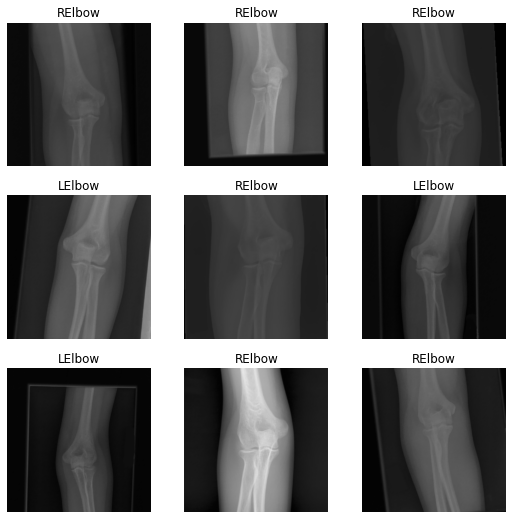

In [12]:
#Load Validity and Training sets under a Seed
dls = ImageDataLoaders.from_name_func(
    ElbowPath, get_image_files(ElbowPath), valid_pct=0.2, seed=69,
    label_func=GetLabel, item_tfms=Resize(144))

#Show a Batch of Images randomly selected with their labels from the file.
dls.train.show_batch()

In [13]:
#Train the model through resnet34 with 35 epochs.
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=35)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.246961,1.435688,0.500000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.119569,1.207194,0.466667,00:01
1,1.113875,1.092421,0.466667,00:01
2,1.134995,0.994213,0.466667,00:01
3,1.189798,0.894001,0.500000,00:01
4,1.111376,0.865959,0.600000,00:01
5,1.103654,0.832308,0.466667,00:01
6,1.023166,0.826048,0.400000,00:01
7,0.951571,0.797156,0.400000,00:01
8,0.884918,0.730416,0.333333,00:01
9,0.836684,0.646092,0.300000,00:01


## Validate the Model

###Uploading a Elbow X-ray

Saving image2.png to image2.png


This is a LElbow.
LElbow 0.985297
RElbow 0.014703


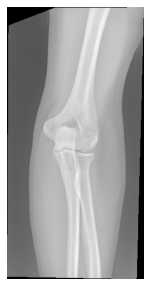

In [15]:
#Enable File Import
from google.colab import files
uploader = files.upload()

#Allow single file import
for img in uploader.items():
  uploadedImg = img[0]

#Show Image and Predict from Images
img = PILImage.create(uploadedImg)
img.show()
label,_,probs = learn.predict(img)

#Print Results
print(f"This is a {label}.")
print(f"{LabelA} {probs[0].item():.6f}")
print(f"{LabelB} {probs[1].item():.6f}")

### Test using Elbow X-rays in Dataset

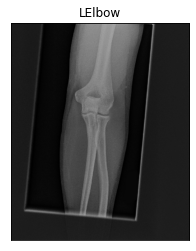

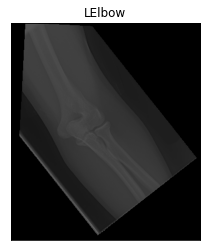

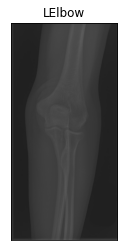

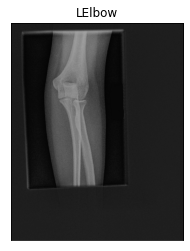

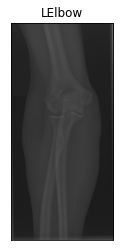

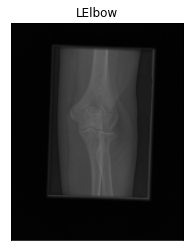

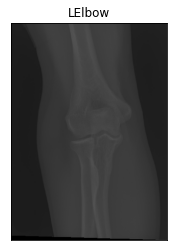

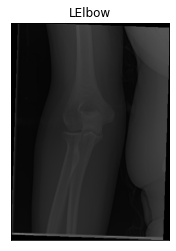

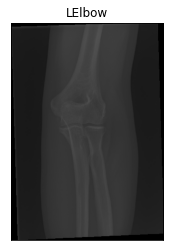

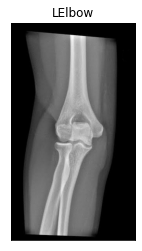

In [21]:
#Iterate Through 10 Images in Dataset
for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(ElbowPath))-1)
  img = mpimg.imread(get_image_files(ElbowPath)[randomIndex])
  

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot()
  
  #Add Image into Plot
  imgplot = plt.imshow(img) 
  
  #Set Headline to predicted label
  ax.set_title(label) 

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

### Confusion Matrix

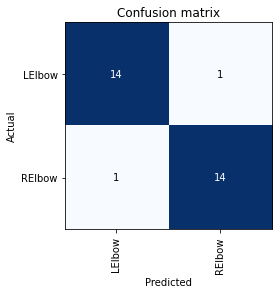

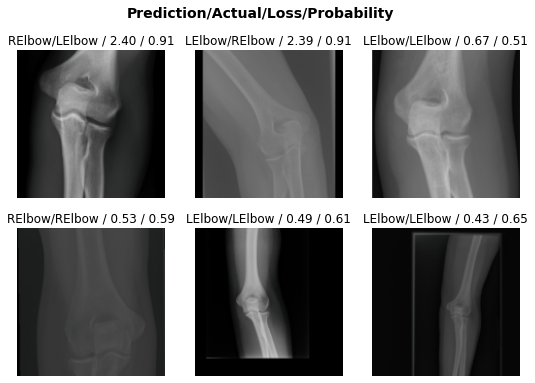

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

## Deploy and Download The Completed Model

In [23]:
#Exports Model as .pkl by Default.
learn.export() 

In [24]:
#Gets the Pkl Filepath
ModelPath = get_files(ElbowPath, '.pkl')[0]
ModelPath

Path('/content/gdrive/My Drive/Elbow/export.pkl')

In [28]:
#raw prediction
learn_inf = load_learner(ModelPath) 

In [26]:
#Gets the Labels
learn_inf.dls.vocab 

['LElbow', 'RElbow']